In [1]:
import pandas as pd
data = pd.read_csv('beer-servings.csv')


In [2]:
data.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [3]:
data.drop(['Unnamed: 0','country','continent'],axis = 1,inplace=True)

In [4]:
data.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0.0,0.0,0.0,0.0
1,89.0,132.0,54.0,4.9
2,25.0,0.0,14.0,0.7
3,245.0,138.0,312.0,12.4
4,217.0,57.0,45.0,5.9


In [ ]:
X = data.drop(['total_litres_of_pure_alcohol'],axis = 1)
y = data['total_litres_of_pure_alcohol']
X.isna().sum()

beer_servings      8
spirit_servings    8
wine_servings      6
dtype: int64

In [14]:
X = X.fillna(X.mean())
y

0       0.0
1       4.9
2       0.7
3      12.4
4       5.9
       ... 
188     7.7
189     2.0
190     0.1
191     2.5
192     4.7
Name: total_litres_of_pure_alcohol, Length: 193, dtype: float64

In [15]:
# X.isna().sum()
y.isna().sum()
y = y.fillna(y.mean())

In [48]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)



In [49]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Input

In [50]:
model = Sequential()

In [51]:
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(5,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1))

# model = Sequential([
#         Dense(10,activation='relu',input_shape = (X_train.shape[1],)),
#         Dense(20,activation='relu'),
#         Dense(1)
# ])

In [52]:
model.compile(optimizer='adam',loss='mse',metrics=['r2_score'])

In [53]:
history = model.fit(X_train,
                    y_train,
                    epochs = 100,
                    validation_data = (X_test,y_test))

Epoch 1/100


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 384.0050 - r2_score: -31.1748 - val_loss: 310.6148 - val_r2_score: -15.1623
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 152.9543 - r2_score: -11.8157 - val_loss: 105.3511 - val_r2_score: -4.4818
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 47.0637 - r2_score: -2.9434 - val_loss: 30.6138 - val_r2_score: -0.5929
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 16.6205 - r2_score: -0.3926 - val_loss: 19.3489 - val_r2_score: -0.0068
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 15.7846 - r2_score: -0.3225 - val_loss: 25.8457 - val_r2_score: -0.3448
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 20.4752 - r2_score: -0.7156 - val_loss: 27.1548 - val_r2_score: -0.4130
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 19.4719 - r2_score: -0.6315 - val_loss: 21.0466 - val_r2_score: -0.0951
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 14.5519 - r2_score: -0.2193 - val_los

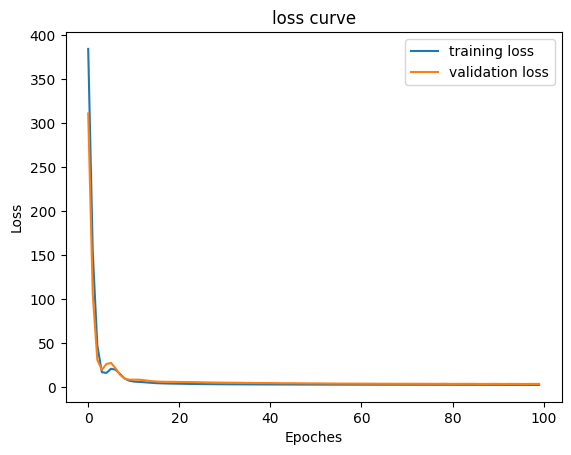

In [54]:
import matplotlib.pyplot as plt
plt.Figure(figsize=(4,4))
plt.plot(history.history['loss'],label = 'training loss')
plt.plot(history.history['val_loss'],label = "validation loss")
plt.title("loss curve")
plt.xlabel("Epoches")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [55]:
model.save('beer_model.keras')

In [58]:
import numpy as np
sample_input = np.array([[1,2,3]])
sample_out = model.predict(sample_input)
sample_out
y_pred= model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


array([[12.4092045 ],
       [ 1.4551717 ],
       [ 4.4454303 ],
       [ 8.529228  ],
       [ 4.9951024 ],
       [ 4.310203  ],
       [ 6.9163723 ],
       [ 1.320479  ],
       [11.053684  ],
       [ 9.976296  ],
       [ 0.5179928 ],
       [ 5.4093127 ],
       [ 1.2565516 ],
       [11.662797  ],
       [ 1.9866854 ],
       [ 2.9134774 ],
       [ 3.0867107 ],
       [ 3.0490222 ],
       [ 0.24827453],
       [13.604108  ],
       [ 0.24827453],
       [10.620191  ],
       [ 1.7336053 ],
       [10.133428  ],
       [ 6.6458507 ],
       [ 1.5627116 ],
       [ 1.2667187 ],
       [ 6.0306153 ],
       [ 9.142293  ],
       [ 1.5165871 ],
       [ 1.6514596 ],
       [ 1.326931  ],
       [ 1.0901543 ],
       [ 0.24827453],
       [ 0.33235303],
       [ 4.84334   ],
       [ 9.824213  ],
       [ 8.628016  ],
       [10.890176  ],
       [ 3.1415946 ],
       [ 6.038056  ],
       [ 6.833885  ],
       [ 7.0636554 ],
       [12.653504  ],
       [ 9.16647   ],
       [ 1

In [59]:
model.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 3.2516 - r2_score: 0.8308


[3.2516183853149414, 0.8308076858520508]